In [ ]:
import matplotlib
%matplotlib inline
from nilearn import datasets
from nilearn import plotting
import nibabel as nib

from neurolang import frontend as fe

destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])

Command for translation:

`blender_obj_to_gifti -i 102311_L.obj -r 102311.L.pial.32k_fs_LR.surf.gii -o 102311.L.manual_drawings.func.gii`

In [ ]:
destrieux_dataset['labels']

In [24]:
surface = nib.load('102311.L.pial.32k_fs_LR.surf.gii')
vertices = surface.darrays[0].data
manual_sulci_gii = nib.load('102311.L.manual_drawings.func.gii')
manual_sulci = dict()
for darray in manual_sulci_gii.darrays:
    name = darray.meta.metadata['Name']
    points = vertices[darray.data.nonzero()]
    manual_sulci[name] = points
    print(f"{name}: number of points {points.shape[0]}")

Superior_temporal_sulcus_NurbsPath.026: number of points 713
Superior_rostral_sulcus_NurbsPath.016: number of points 132
Superior_occipital_sulcus_NurbsPath.033: number of points 356
Superior_frontal_sulcus_NurbsPath.010: number of points 807
Subparietal_sulcus_NurbsPath.008: number of points 323
Rhinal_sulcus_NurbsPath.039: number of points 79
Precentral_sulcus_NurbsPath.009: number of points 570
Posterior_subcentral_sulcus_NurbsPath.019: number of points 22
Postcentral_sulcus_NurbsPath.020: number of points 683
Parieto_occipital_sulcus_NurbsPath.003: number of points 247
Paracentral_sulcus_NurbsPath.013: number of points 87
Olfactory_sulcus_NurbsPath.035: number of points 138
Occipitotemporal_sulcus_NurbsPath.038: number of points 289
Middle_frontal_sulcus_NurbsPath.024: number of points 175
Medial_frontal_sulcus_NurbsPath.012: number of points 553
Marginal_sulcus_NurbsPath.006: number of points 166
Lunate_sulcus_NurbsPath.025: number of points 94
Lateral_occipital_sulcus_NurbsPath.0

/Users/dwasserm/software/nibabel/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/Users/dwasserm/software/nibabel/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='102311.L.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/Users/dwasserm/software/nibabel/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='102311.L.manual_drawings.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [26]:
nl = fe.RegionFrontend()
for label_number, name in destrieux_dataset['labels']:
    name = name.decode()
    if not name.startswith('L ') or ('S_' not in name and 'Lat_Fis' not in name and 'Pole' not in name) or ('G_' in name) or ('circular' in name):
        continue

    # Create a region object
    region = nl.create_region(destrieux_map, label=label_number)

    # Fine tune the symbol name
    name = 'L_' + name[2:].replace('-', '_')
    nl.add_region(region, result_symbol_name=name)
    
for name, points in manual_sulci.items():
    nl.add_region(points, result_symbol_name='manual_{name}')

NameError: name 'fe' is not defined

# Primary sulci


primary_sulci: typing.AbstractSet[neurolang.regions.Region] = ['L_Pole_temporal', 'L_S_calcarine', 'L_Lat_Fis_ant_Horizont', 'L_Lat_Fis_post', 'L_S_parieto_occipital', 'L_Pole_occipital', 'L_Lat_Fis_ant_Vertical', 'L_S_central', 'L_S_pericallosal']


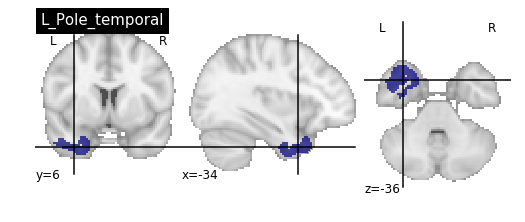

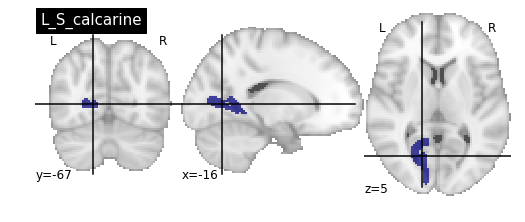

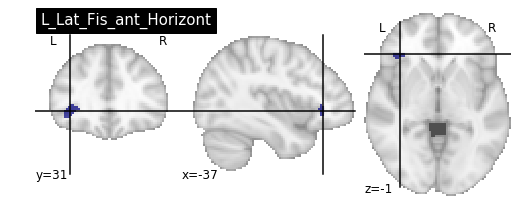

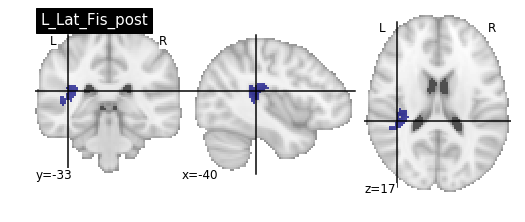

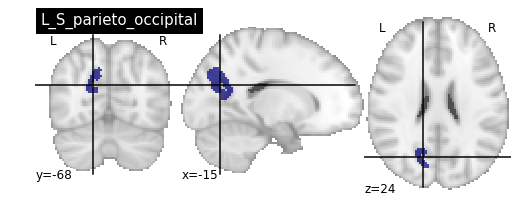

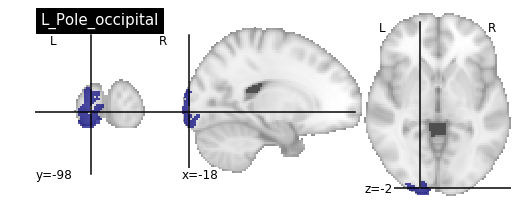

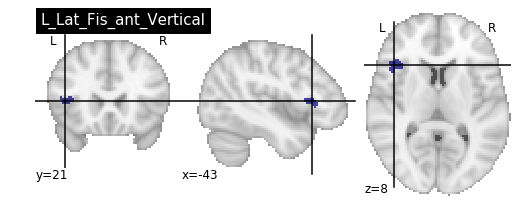

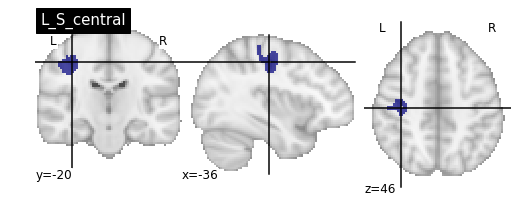

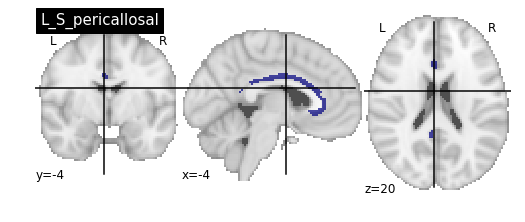

In [4]:
Primary_sulci= set()
for name in nl.region_names:
    if 'Lat_Fis' in name or 'parieto_occipital' in name or 'Pole' in name or 'S_central' in name or 'S_calcarine' in name or 'pericallosal' in name:
        Primary_sulci.add(nl.symbols[name])
        
primary_sulci = nl.add_region_set(Primary_sulci, name='primary_sulci')
print(primary_sulci)
for sulcus in primary_sulci:
    plotting.plot_roi(sulcus.value.spatial_image(), title=sulcus.symbol_name)

# Secondary sulci


In [5]:
Secondary_sulci=set()
secondary_sulci = nl.add_region_set(Secondary_sulci, name='secondary_sulci')

## Transverse Temporal sulcus

Looking for the Transverse Temporal Sulcus
Found


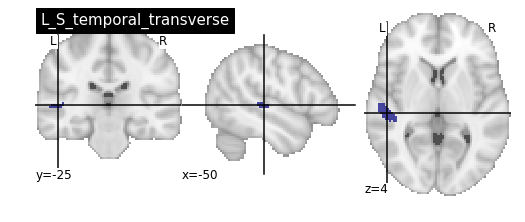

In [6]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_ant) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci)
    )
)

res = q.do()

print("Looking for the Transverse Temporal Sulcus")

if len(res) != 1:
    print("More than one sulcus or no sulcus found")
else:
    print("Found")
    nl_tts = next(s for s in res)
    Secondary_sulci.add(nl_tts)
    plotting.plot_roi(nl_tts.value.spatial_image(), title=nl_tts.symbol_name)

## Lateral Occipitotemporal sulcus

Looking for the Occipitotemporal Sulcus
Found


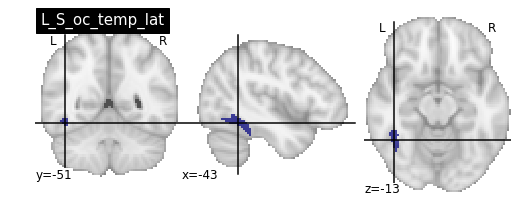

In [7]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_post) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci)
    )
)
res = q.do()
print("Looking for the Occipitotemporal Sulcus")

if len(res) != 1:
    print("More than one sulcus or no sulcus found")
else:
    print("Found")
    nl_ots = next(s for s in res)
    Secondary_sulci.add(nl_ots)
    plotting.plot_roi(nl_ots.value.spatial_image(), title=nl_ots.symbol_name)

## Collateral sulcus: anterior part

Looking for the Collateral Sulcus (anterior part)
Found


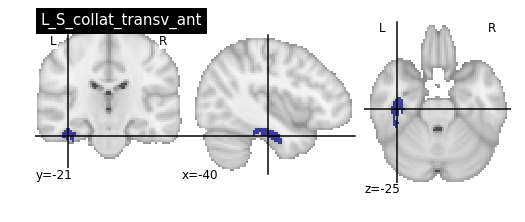

In [8]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci)
    )
)
res = q.do()
print("Looking for the Collateral Sulcus (anterior part)")

if len(res) != 1:
    print("More than one sulcus or no sulcus found")
else:
    print("Found")
    nl_collat_ant = next(s for s in res)
    Secondary_sulci.add(nl_collat_ant)
    plotting.plot_roi(nl_collat_ant.value.spatial_image(), title=nl_collat_ant.symbol_name)

## Intermediate Primus of Jensen


Looking for the Intermediate Primus of Jensen
Found


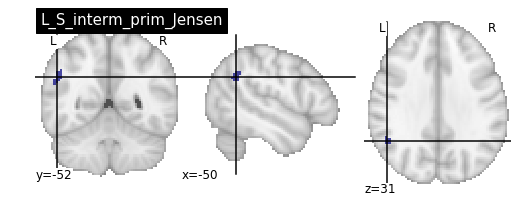

In [9]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci)
    )
)
res = q.do()
print("Looking for the Intermediate Primus of Jensen")

if len(res) != 1:
    print("More than one sulcus or no sulcus found")
else:
    print("Found")
    nl_ipoj = next(s for s in res)
    Secondary_sulci.add(nl_ipoj)
    plotting.plot_roi(nl_ipoj.value.spatial_image(), title=nl_ipoj.symbol_name)

## Subparietal sulcus

Looking for the Subparietal Sulcus
Found


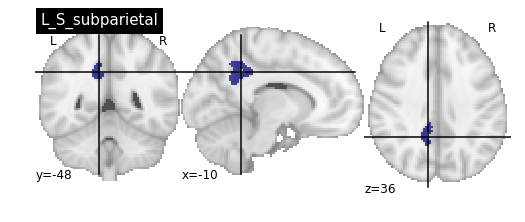

In [10]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")

if len(res) != 1:
    print("More than one sulcus or no sulcus found")
else:
    print("Found")
    nl_subparietal = next(s for s in res)
    Secondary_sulci.add(nl_subparietal)
    plotting.plot_roi(nl_subparietal.value.spatial_image(), title=nl_subparietal.symbol_name)

Looking for the Subparietal Sulcus
Found


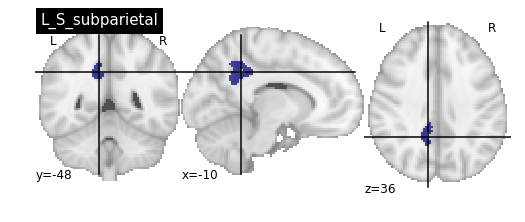

In [11]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")

if len(res)== 0:
    print("No sulcus found")
elif len(res)>1:
    print("More than one sulcus found")
else:
    print("Found")
    nl_subparietal = next(s for s in res)
    Secondary_sulci.add(nl_subparietal)
    plotting.plot_roi(nl_subparietal.value.spatial_image(), title=nl_subparietal.symbol_name)

## Looking for precentral superior and inferior parts

Looking for the Precentral Sulcus superior part
L_S_precentral_sup_part
Others found


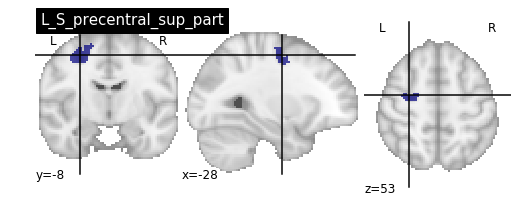

In [12]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci)
    )
)
res = q.do()
print("Looking for the Precentral Sulcus superior part")

for r in res:
    if len(res)==0:
        print("No sulcus found")
    elif len(res)==1 and "precentral_sup" in r.symbol_name:
        print("Found Precentral superior part only")
        print(r.symbol_name)
        nl_precentral_sup = next(s for s in res)
        Secondary_sulci.add(nl_precentral_sup)
        plotting.plot_roi(nl_precentral_sup.value.spatial_image(), title=nl_precentral_sup.symbol_name)
    elif len(res)==2 and "precentral_sup" in r.symbol_name:
        print(r.symbol_name)
        nl_precentral_sup = next(s for s in res)
        Secondary_sulci.add(nl_precentral_sup)
        plotting.plot_roi(nl_precentral_sup.value.spatial_image(), title=nl_precentral_sup.symbol_name)
    else:
        print("Others found")

In [13]:
secondary_sulci = nl.add_region_set(Secondary_sulci, name='secondary_sulci')
print(secondary_sulci)
len(Secondary_sulci)


secondary_sulci: typing.AbstractSet[neurolang.regions.Region] = ['L_S_precentral_sup_part', 'L_S_oc_temp_lat', 'L_S_interm_prim_Jensen', 'L_S_subparietal', 'L_S_collat_transv_ant', 'L_S_temporal_transverse']


6

Looking for the Precentral Sulcus inferior part
Found Precentral inferior part only
L_S_precentral_inf_part


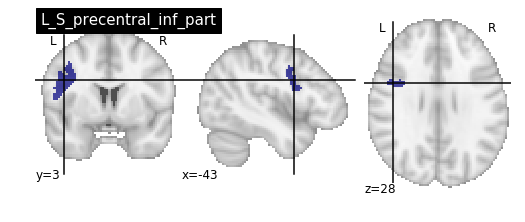

In [14]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci)
    )
)
res = q.do()
print("Looking for the Precentral Sulcus inferior part")

for r in res:
    if len(res)==0:
        print("No sulcus found")
    elif len(res)==1 and "precentral_inf" in r.symbol_name:
        print("Found Precentral inferior part only")
        print(r.symbol_name)
        nl_precentral_inf = next(s for s in res)
        Secondary_sulci.add(nl_precentral_inf)
        plotting.plot_roi(nl_precentral_inf.value.spatial_image(), title=nl_precentral_inf.symbol_name)
    elif len(res)==2 and "precentral_inf" in r.symbol_name:
        print(r.symbol_name)
        nl_precentral_inf = next(s for s in res)
        Secondary_sulci.add(nl_precentral_inf)
        plotting.plot_roi(nl_precentral_inf.value.spatial_image(), title=nl_precentral_inf.symbol_name)
    else:
        print("Others found")
        print(r.symbol_name)

In [15]:
secondary_sulci = nl.add_region_set(Secondary_sulci, name='secondary_sulci')
print(secondary_sulci)
len(Secondary_sulci)


secondary_sulci: typing.AbstractSet[neurolang.regions.Region] = ['L_S_precentral_sup_part', 'L_S_oc_temp_lat', 'L_S_interm_prim_Jensen', 'L_S_subparietal', 'L_S_collat_transv_ant', 'L_S_temporal_transverse', 'L_S_precentral_inf_part']


7

# Tertiary sulci

In [16]:
Tertiary_sulci=set()
tertiary_sulci = nl.add_region_set(Tertiary_sulci, name='tertiary_sulci')

## Occipital superior and transversal sulci

Looking for the Superior Occipital and Transversal sulci
Found


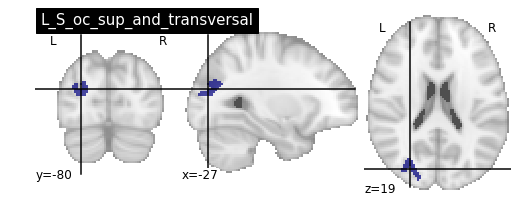

In [17]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl_subparietal) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci) &
        ~nl.symbols.isin(x, tertiary_sulci)
    )
)
res = q.do()
print("Looking for the Superior Occipital and Transversal sulci")

if len(res)== 0:
    print("No sulcus found")
elif len(res)>1:
    print("More than one sulcus found")
else:
    print("Found")
    nl_oc_sup_trans = next(s for s in res)
    Tertiary_sulci.add(nl_oc_sup_trans)
    plotting.plot_roi(nl_oc_sup_trans.value.spatial_image(), title=nl_oc_sup_trans.symbol_name)

## Intraparietal sulcus

Looking for the Intraparietal Sulcus
Found


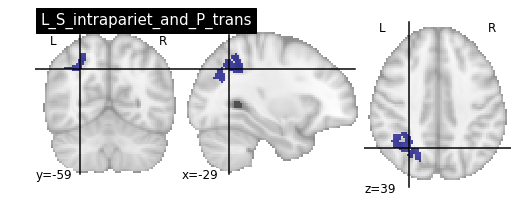

In [18]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_occipital) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci) &
        ~nl.symbols.isin(x, tertiary_sulci)
    )
)
res = q.do()
print("Looking for the Intraparietal Sulcus")

if len(res)== 0:
    print("No sulcus found")
elif len(res)>1:
    print("More than one sulcus found")
else:
    print("Found")
    nl_ips = next(s for s in res)
    Tertiary_sulci.add(nl_ips)
    plotting.plot_roi(nl_ips.value.spatial_image(), title=nl_ips.symbol_name)

Looking for the Intraparietal Sulcus
Found


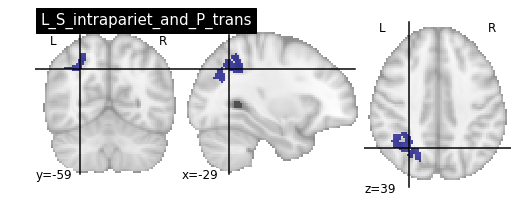

In [19]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_occipital) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci)# &
#         ~nl.symbols.isin(x, tertiary_sulci)
    )
)
res = q.do()
print("Looking for the Intraparietal Sulcus")

if len(res)== 0:
    print("No sulcus found")
elif len(res)>1:
    print("More than one sulcus found")
else:
    print("Found")
    nl_ips = next(s for s in res)
    Tertiary_sulci.add(nl_ips)
    plotting.plot_roi(nl_ips.value.spatial_image(), title=nl_ips.symbol_name)

## Superior frontal sulcus

Looking for the Superior Frontal Sulcus
Found


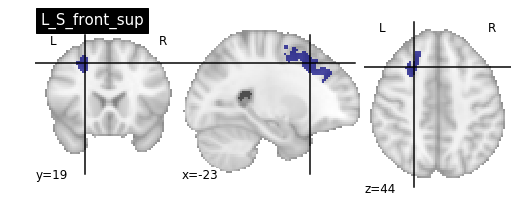

In [20]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl_ipoj) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci) &
        ~nl.symbols.isin(x, tertiary_sulci)
    )
)
res = q.do()
print("Looking for the Superior Frontal Sulcus")

if len(res)== 0:
    print("No sulcus found")
elif len(res)>1:
    print("More than one sulcus found")
else:
    print("Found")
    nl_sfs = next(s for s in res)
    Tertiary_sulci.add(nl_sfs)
    plotting.plot_roi(nl_sfs.value.spatial_image(), title=nl_sfs.symbol_name)

## Postcentral sulcus 

Looking for the Postcentral Sulcus
Found


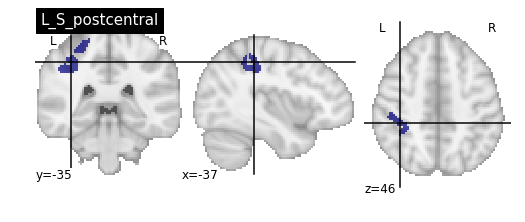

In [21]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl_precentral_sup) &
        nl.symbols.anatomical_superior_of(x, nl_subparietal) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci) &
        ~nl.symbols.isin(x, tertiary_sulci)
    )
)
res = q.do()
print("Looking for the Postcentral Sulcus")

if len(res)== 0:
    print("No sulcus found")
elif len(res)>1:
    print("More than one sulcus found")
else:
    print("Found")
    nl_pocs = next(s for s in res)
    Tertiary_sulci.add(nl_pocs)
    plotting.plot_roi(nl_pocs.value.spatial_image(), title=nl_pocs.symbol_name)

## Middle frontal sulcus

Looking for the Middle Frontal Sulcus
Found


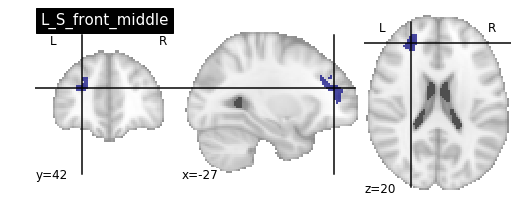

In [22]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl_precentral_sup) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_ant_Vertical) &
        nl.symbols.anatomical_inferior_of(x, nl_precentral_sup) &
        ~nl.symbols.isin(x, primary_sulci) &
        ~nl.symbols.isin(x, secondary_sulci) &
        ~nl.symbols.isin(x, tertiary_sulci)
    )
)
res = q.do()
print("Looking for the Middle Frontal Sulcus")

if len(res)== 0:
    print("No sulcus found")
elif len(res)>1:
    print("More than one sulcus found")
else:
    print("Found")
    nl_mfs = next(s for s in res)
    Tertiary_sulci.add(nl_mfs)
    plotting.plot_roi(nl_mfs.value.spatial_image(), title=nl_mfs.symbol_name)

In [23]:
tertiary_sulci = nl.add_region_set(Tertiary_sulci, name='tertiary_sulci')
print(tertiary_sulci)
print(len(tertiary_sulci))

tertiary_sulci: typing.AbstractSet[neurolang.regions.Region] = ['L_S_postcentral', 'L_S_oc_sup_and_transversal', 'L_S_front_sup', 'L_S_intrapariet_and_P_trans', 'L_S_front_middle']
5


In [24]:
x = nl.new_region_symbol('x')
temporal_lobe_query = nl.query(
    x,
    nl.symbols.anatomical_inferior_of(x, nl.symbols.L_S_parieto_occipital) &
    nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
    nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
)
temporal_lobe = q.do() #result_symbol_name='temporal_lobe')
print(temporal_lobe)

##################################################
#

#q = nl.query(
#    x,
  #  nl.symbols.isin(x, temporal_lobe) &
#    ~nl.symbols.anatomical_inferior_of(x, nl.symbols.l_s_temporal_inf)
#)

# print(q)

018c3b5b-f6e2-11e8-bed4-8cec4bd9aee6: typing.AbstractSet[neurolang.regions.Region] = ['L_S_front_middle']


In [25]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.
